# Udacity Data Scientist Nanodegree - Project 1

This is the Write a Data Science Blog Post project for the Udacity Data Scientist Nanodegree Project.
While preparing this project, CRISP-DM processes were taken as basis.
<br />1- Business Understanding
<br />2- Data Understanding
<br />3- Prepare Data
<br />4- Data Modeling
<br />5- Evaluate the Results

<br /> This work gives answer five questions about 2021 Stackoverflow Survey
<br />1- Which are the top 10 countries where respondents live?
<br />2- What are the main branch of respondents?
<br />3- What are the respondent's age group?
<br />4- What are the respondent's educational background?
<br />5- What are the top 10 programming languages for the respondents?

In [1]:
import numpy as np
import pandas as pd

#make plots
import matplotlib.pyplot as plt
import seaborn as sns
# to display graphs in jupyter notebook
%matplotlib inline

%load_ext pycodestyle_magic

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [55]:
# Read The Stack Overflow Developers Survey 2021 main data file
data_df = pd.read_csv(r"C:\Users\TCVOAYDOGMUS\Documents\Udacity_Data_Science_Nanodegree\Project1-Udacity_Write_a_Data_Science_Blog_Post\survey_results_public.csv")

- Data Understanding

In [4]:
# first looking data
data_df.head(3)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN


In [7]:
# lets look for all columns of data types and missing values
data_df.info()
print(data_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [6]:
data_df.shape[0]

83439

# Question 1 : 
Which are the top 10 countries where respondents live?

- Data Modelling and Prapering  

In [8]:
# Show all responents counts by country
# Prepating data : I want to change from "United Kingdom of Great Britain and Northern Ireland" to "UK & Ireland". Becuase the data is too long to display in the table.

data_df['Country'] = data_df['Country'].replace("United Kingdom of Great Britain and Northern Ireland", 'UK & Ireland')

data_df['Country'].value_counts()

United States of America            15288
India                               10511
Germany                              5625
UK & Ireland                         4475
Canada                               3012
                                    ...  
Saint Vincent and the Grenadines        1
Dominica                                1
Liechtenstein                           1
Tuvalu                                  1
Saint Kitts and Nevis                   1
Name: Country, Length: 181, dtype: int64

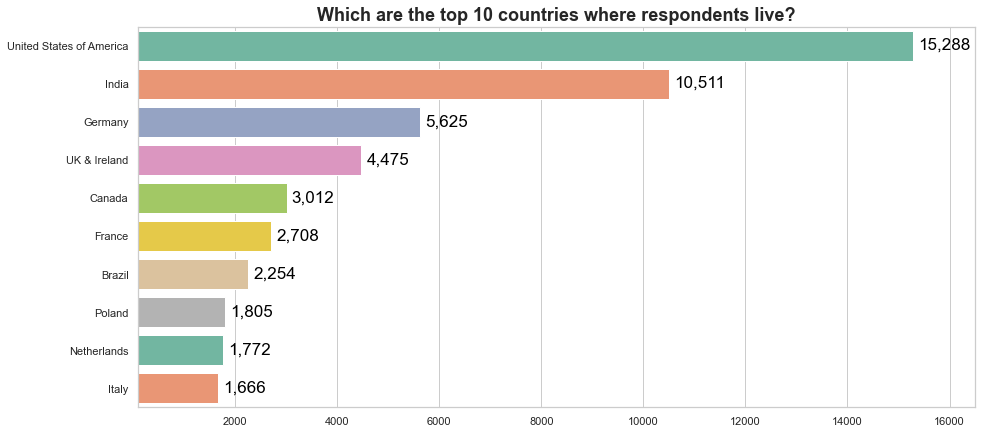

In [156]:
#First make copy of dataframe and then Filter a dataframe by country, select is unnull and then count the number of rows
country_val =  data_df['Country'].loc[data_df['Country'].isna()==False].value_counts()[:10]

sns.set(style = 'whitegrid')
plt.figure(figsize = (15,7))
plt.title('Which are the top 10 countries where respondents live?' ,weight='bold', horizontalalignment='center').set_fontsize('18')
ax = sns.countplot(y = 'Country', data = data_df, color = 'darkgoldenrod', order =country_val.index, palette="Set2")
plt.xlim(100, 16500)
ax.set(xlabel=None)
ax.set(ylabel=None)

for p in ax.patches:
        ax.annotate('{:,}'.format(p.get_width()) , xy=(p.get_width()+100, p.get_y()+0.5), color='black', size=17)

# Most programmers live in USA and India!

In [47]:
country_val

United States of America    15288
India                       10511
Germany                      5625
UK & Ireland                 4475
Canada                       3012
France                       2708
Brazil                       2254
Poland                       1805
Netherlands                  1772
Italy                        1666
Name: Country, dtype: int64

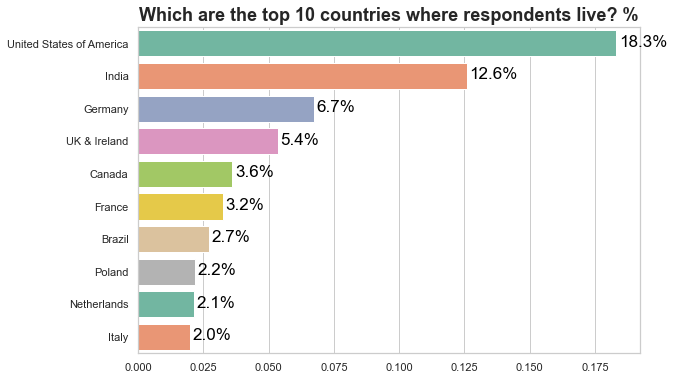

In [157]:
#First make copy of dataframe and then Filter a dataframe by country, select is unnull and then calculate percentage of respondents by country
country_perc = (data_df['Country'].value_counts()/data_df.shape[0])[:10]

plt.figure(figsize=(9,6))
sns.set(style = 'whitegrid')
ax = sns.barplot(x=country_perc.values, y=country_perc.index, palette="Set2", orient="h" );

plt.title('Which are the top 10 countries where respondents live? %' ,weight='bold', horizontalalignment='center').set_fontsize('18')
ax.set_xlabel("Percentage")
ax.set(xlabel=None)
ax.set(ylabel=None);

for p in ax.patches:
        ax.annotate('{:.1%}'.format(p.get_width()) , xy=(p.get_width()+0.001, p.get_y()+0.5), color='black', size=17)

# Most programmers live in USA and India!

- Evaluate the Results
<br>According to more than 80,000 participants, the number of participants living in the USA is 15K (%18) and in India 10K (%12.6). Germany and United Kingdom its follow.

# Question 2 : 
What are the main branch of respondents?

- Data Modelling and Prapering  

In [19]:
# First make copy of dataframe and then Filter a dataframe by Main Branch, calculate the number of respondents by Main Branch
branch_main = data_df[['MainBranch','ResponseId']].loc[data_df['MainBranch'].isna()==False]
branch_main.MainBranch.value_counts()

I am a developer by profession                                                   58153
I am a student who is learning to code                                           12029
I am not primarily a developer, but I write code sometimes as part of my work     6578
I code primarily as a hobby                                                       4929
I used to be a developer by profession, but no longer am                          1237
None of these                                                                      513
Name: MainBranch, dtype: int64

In [22]:
#numpy like conditional if else statement to clear the data
branch_main['Branch_Clear'] = ''

conditions = [
    branch_main['MainBranch'] == 'I am a developer by profession',
    branch_main['MainBranch'] == 'I am a student who is learning to code',
    branch_main['MainBranch'] == 'I am not primarily a developer, but I write code sometimes as part of my work',
    branch_main['MainBranch'] == 'I code primarily as a hobby',
    branch_main['MainBranch'] == 'I used to be a developer by profession, but no longer am',
    branch_main['MainBranch'] == 'None of these'
    ]
choices = 'Developer', 'Student learning to code','As part of work','As a hobby','Developer in past','None of these'

branch_main['Branch_Clear'] = np.select(conditions, choices, default=branch_main['MainBranch'])

In [23]:
# lets see results
branch_main.Branch_Clear.value_counts()

Developer                   58153
Student learning to code    12029
As part of work              6578
As a hobby                   4929
Developer in past            1237
None of these                 513
Name: Branch_Clear, dtype: int64

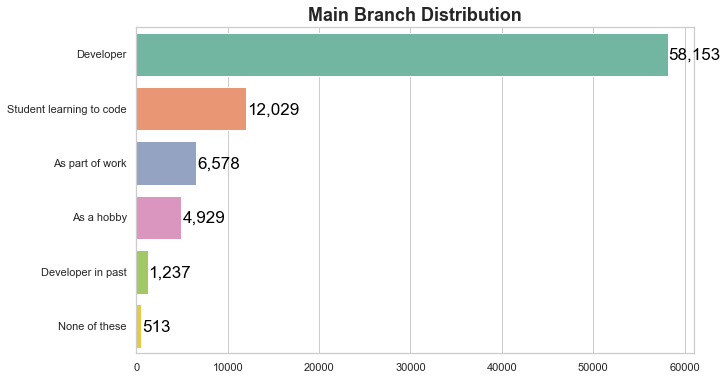

In [26]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(10,6))
plt.title("Main Branch Distribution" ,weight='bold', horizontalalignment='center').set_fontsize('18')
ax = sns.countplot(y = 'Branch_Clear', data = branch_main, color = 'darkgoldenrod', order =branch_main['Branch_Clear'].value_counts().index, palette="Set2")
ax.set(xlabel=None)
ax.set(ylabel=None)

for p in ax.patches:
        ax.annotate('{:,}'.format(p.get_width()) , xy=(p.get_width()+100, p.get_y()+0.5), color='black', size=17)

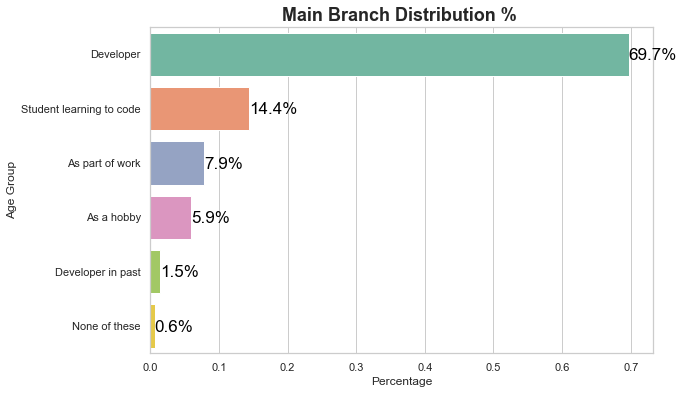

In [27]:
#First make copy of dataframe and then Filter a dataframe by branch, calculate percentage of respondents by branch.
branch_perc = (branch_main['Branch_Clear'].value_counts()/branch_main.shape[0])
plt.figure(figsize=(9,6))
ax = sns.barplot(x=branch_perc.values, y=branch_perc.index, palette="Set2", orient="h" );

plt.title("Main Branch Distribution % " ,weight='bold', horizontalalignment='center').set_fontsize('18')
ax.set_xlabel("Percentage")
ax.set_ylabel("Age Group");

for p in ax.patches:
        ax.annotate('{:.1%}'.format(p.get_width()) , xy=(p.get_width(), p.get_y()+0.5), color='black', size=17)

- Evaluate the Results
<br>Top 3 Branch is Devoloper, Student for learning and person which is its part of work.
<br>Developer is the main branch of respondents aprox %70.
<br>Developers in the past is lowest part of respondents.

# Question 3 : 
What are the respondent's age group?

- Data Modelling and Prapering  

In [28]:
# lets look distribution of age group
data_df['Age'].value_counts()

25-34 years old       32568
18-24 years old       20993
35-44 years old       15183
45-54 years old        5472
Under 18 years old     5376
55-64 years old        1819
Prefer not to say       575
65 years or older       421
Name: Age, dtype: int64

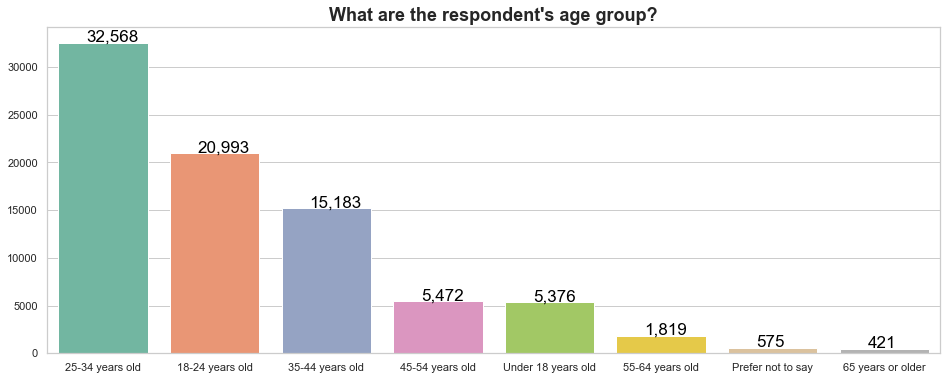

In [146]:
sns.set(style = 'whitegrid')

plt.figure(figsize=(16,6))
plt.title("What are the respondent's age group?" , weight='bold', horizontalalignment='center').set_fontsize('18')
ax = sns.countplot(x = "Age", data = data_df, order = data_df['Age'].value_counts().index[ : ] , palette="Set2")
ax.set(xlabel=None)
ax.set(ylabel=None)

for p in ax.patches:
    ax.annotate('{:,}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height()+100),  color='black', size=17)

# over 30K repondents is between 25 and 34 years range. over 59K person is under 34 years old!! This mean is young generation loves the programming :)

- Evaluate the Results
<br>Over 30K repondents is between 25 and 34 years range. over 59K person is under 34 years old!! 
<br>This mean is young generation loves the programming :)

# Question 4 : 
What are the respondent's educational background?

- Data Modelling and Prapering

In [29]:
# First make copy of dataframe and then Filter a dataframe by Educational Level, calculate the number of respondents by this level
educ_df = data_df[['EdLevel','ResponseId']].copy()
educ_df.EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          35357
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       17512
Some college/university study without earning a degree                                10589
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     9534
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2567
Primary/elementary school                                                              2479
Associate degree (A.A., A.S., etc.)                                                    2231
Something else                                                                         1601
Professional degree (JD, MD, etc.)                                                     1256
Name: EdLevel, dtype: int64

In [31]:
# The contents are too long. So, added a column which summarized the educational level explanation 'Clear_Edlevel'.
educ_df[['Clear_Edlevel', 'split_2']] = educ_df['EdLevel'].str.split('(', n=1, expand=True)

# dropped split_2 column. because it is not required, dirty data. 
educ_df = educ_df.drop(['split_2'], axis =1)
educ_df['Clear_Edlevel'] = np.where(educ_df['Clear_Edlevel'] == 'Some college/university study without earning a degree', 'College/university no degree', educ_df['Clear_Edlevel'])

In [32]:
educ_df['Clear_Edlevel'].value_counts()

Bachelor’s degree               35357
Master’s degree                 17512
College/university no degree    10589
Secondary school                 9534
Other doctoral degree            2567
Primary/elementary school        2479
Associate degree                 2231
Something else                   1601
Professional degree              1256
Name: Clear_Edlevel, dtype: int64

In [43]:
# sns.set(style = 'whitegrid')

# plt.figure(figsize=(16,6))
# plt.title("What are the respondent's age group?" , weight='bold', horizontalalignment='center').set_fontsize('18')
# ax = sns.countplot(x = "EdLevel", data = data_df, order = data_df['EdLevel'].value_counts().index[ : ] , palette="Set2")
# ax.set(xlabel=None)
# ax.set(ylabel=None)
# for p in ax.patches:
#     ax.annotate('{:,}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.55),  color='black', size=17)


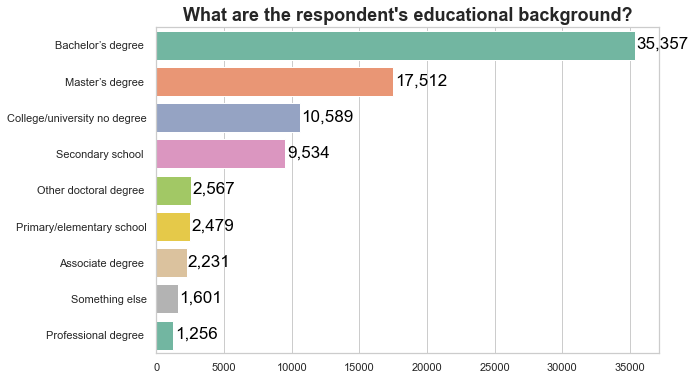

In [33]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(9,6))
plt.title("What are the respondent's educational background?" ,weight='bold', horizontalalignment='center').set_fontsize('18')
ax = sns.countplot(y = 'Clear_Edlevel', data = educ_df, color = 'darkgoldenrod', order =educ_df['Clear_Edlevel'].value_counts().index, palette="Set2")
ax.set(xlabel=None)
ax.set(ylabel=None)

for p in ax.patches:
        ax.annotate('{:,}'.format(p.get_width()) , xy=(p.get_width()+100, p.get_y()+0.5), color='black', size=17)

# At least 42K people went to University

In [34]:
(educ_df['Clear_Edlevel'].value_counts()/educ_df.shape[0])

Bachelor’s degree               0.423747
Master’s degree                 0.209878
College/university no degree    0.126907
Secondary school                0.114263
Other doctoral degree           0.030765
Primary/elementary school       0.029710
Associate degree                0.026738
Something else                  0.019188
Professional degree             0.015053
Name: Clear_Edlevel, dtype: float64

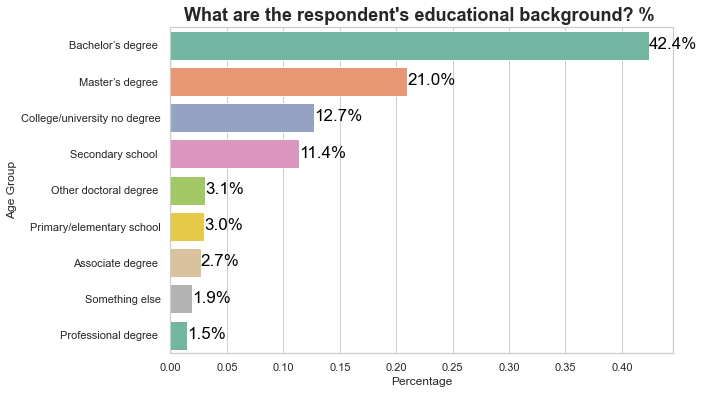

In [35]:
# Calculate the percentange of respondents by this level
educ_perc = (educ_df['Clear_Edlevel'].value_counts()/educ_df.shape[0])

plt.figure(figsize=(9,6))
ax = sns.barplot(x=educ_perc.values, y=educ_perc.index, palette="Set2", orient="h" );

plt.title("What are the respondent's educational background? % " ,weight='bold', horizontalalignment='center').set_fontsize('18')
ax.set_xlabel("Percentage")
ax.set_ylabel("Age Group");

for p in ax.patches:
        ax.annotate('{:.1%}'.format(p.get_width()) , xy=(p.get_width(), p.get_y()+0.5), color='black', size=17)

- Evaluate the Results
<br>At least 42K people went to university. 
<br>%42 of respondents was graduated from bachelor's degree.

# Question 5 : 
What are the top 10 programming languages for the respondents?

- Data Modelling and Prapering

In [36]:
# First make copy of dataframe and then Filter a dataframe by knowledge of Programming Language., calculate the number of respondents by this knowledge
lang_df = data_df[['ResponseId','LanguageHaveWorkedWith']].loc[data_df['LanguageHaveWorkedWith'].isna()==False]

In [37]:
lang_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82357 entries, 0 to 83438
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ResponseId              82357 non-null  int64 
 1   LanguageHaveWorkedWith  82357 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.9+ MB


In [38]:
# LanguageHaveWorkedWith is object and have to split ';' for counting. After that this type will become like list
lang_df['prog_split'] = lang_df['LanguageHaveWorkedWith'].str.split(';')

In [39]:
# read in 'prog_split' and counting inside 
pd.Series([item for sublist in lang_df.prog_split for item in sublist]).value_counts().head(3)

JavaScript    53587
HTML/CSS      46259
Python        39792
dtype: int64

In [41]:
# separate percentage and counts
lang_val=pd.Series([item for sublist in lang_df.prog_split for item in sublist]).value_counts()
land_perc=pd.Series([item for sublist in lang_df.prog_split for item in sublist]).value_counts()/lang_df.shape[0]

In [226]:
land_perc.head(3)

JavaScript    0.650667
HTML/CSS      0.561689
Python        0.483165
dtype: float64

In [48]:
lang_val.dtype

dtype('int64')

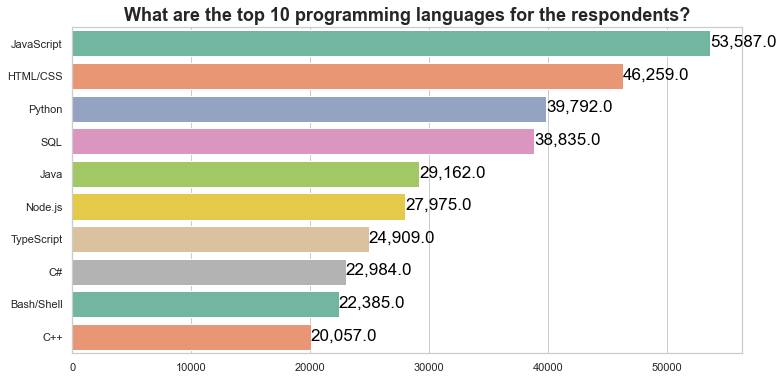

In [42]:
plt.figure(figsize=(12,6))
sns.set(style = 'whitegrid')
ax = sns.barplot(x=lang_val[:10].values, y=lang_val[:10].index, palette="Set2", orient="h" );

plt.title('What are the top 10 programming languages for the respondents?' ,weight='bold', horizontalalignment='center').set_fontsize('18')
ax.set_xlabel("Percentage")
ax.set(xlabel=None)
ax.set(ylabel=None);

for p in ax.patches:
        ax.annotate('{:,}'.format(p.get_width()) , xy=(p.get_width()+0.003, p.get_y()+0.5), color='black', size=17)

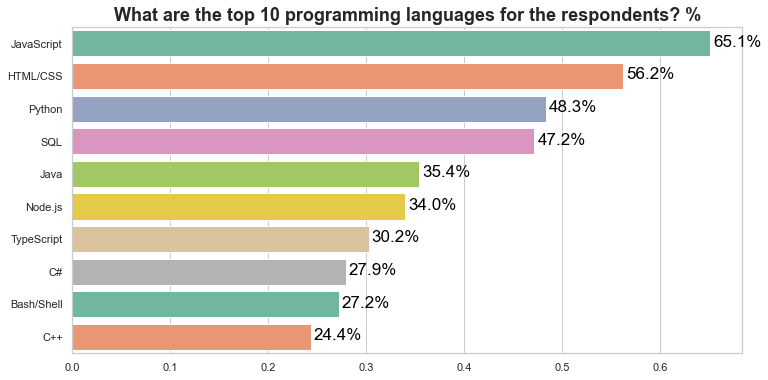

In [254]:
plt.figure(figsize=(12,6))
sns.set(style = 'whitegrid')
ax = sns.barplot(x=land_perc[:10].values, y=land_perc[:10].index, palette="Set2", orient="h" );

plt.title('What are the top 10 programming languages for the respondents? %' ,weight='bold', horizontalalignment='center').set_fontsize('18')
ax.set_xlabel("Percentage")
ax.set(xlabel=None)
ax.set(ylabel=None);

for p in ax.patches:
        ax.annotate('{:.1%}'.format(p.get_width()) , xy=(p.get_width()+0.003, p.get_y()+0.5), color='black', size=17)

- Evaluate the Results
<br>%65 of respondents (approx. 54K) loves to JavaScript unbelievable :OMG:
<br>%24 of loves C++ is old-school :)

In [82]:
# alternative solution for programming language / with functions

langworked_counts = lang_df["LanguageHaveWorkedWith"].value_counts(normalize=True)


def count_dict(column_name):
    '''
    Split column by ;,
    Returns a splited series.
    '''
    counts = {}
    for row in lang_df[column_name] : 
        items = row.split(";")
        for item in items :
            counts[item] = counts.get(item, 0)+1
    return counts

def sort_to_sum(counts):
    # sorting w.r.t values
    counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}

    # converting into sum lang. for values
    tot = sum(counts.values())
    for key, val in counts.items():
        counts[key] = val
    return counts

langworked_counts = count_dict("LanguageHaveWorkedWith")

# sorting w.r.t to values and converting values to sum
langworked_counts = sort_to_sum(langworked_counts)
print(langworked_counts) 

{'JavaScript': 53587, 'HTML/CSS': 46259, 'Python': 39792, 'SQL': 38835, 'Java': 29162, 'Node.js': 27975, 'TypeScript': 24909, 'C#': 22984, 'Bash/Shell': 22385, 'C++': 20057, 'PHP': 18130, 'C': 17329, 'PowerShell': 8871, 'Go': 7879, 'Kotlin': 6866, 'Rust': 5799, 'Ruby': 5569, 'Dart': 4965, 'Assembly': 4632, 'Swift': 4204, 'R': 4185, 'VBA': 3847, 'Matlab': 3846, 'Groovy': 2479, 'Objective-C': 2310, 'Scala': 2148, 'Perl': 2028, 'Haskell': 1749, 'Delphi': 1731, 'Clojure': 1552, 'Elixir': 1438, 'LISP': 1096, 'Julia': 1068, 'F#': 804, 'Erlang': 651, 'APL': 536, 'Crystal': 466, 'COBOL': 437}


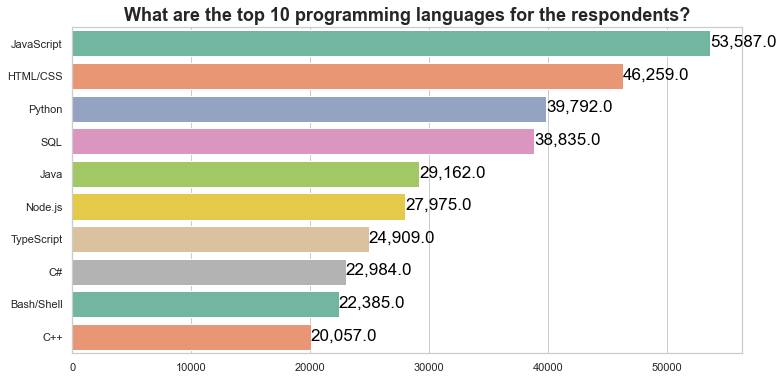

In [83]:
plt.figure(figsize=(12,6))
sns.set(style = 'whitegrid')
ax = sns.barplot(x=list(langworked_counts.values())[:10], y=list(langworked_counts.keys())[:10], palette="Set2", orient="h" );

plt.title('What are the top 10 programming languages for the respondents?' ,weight='bold', horizontalalignment='center').set_fontsize('18')
ax.set_xlabel("Percentage")
ax.set(xlabel=None)
ax.set(ylabel=None);

for p in ax.patches:
        ax.annotate('{:,}'.format(p.get_width()) , xy=(p.get_width()+0.005, p.get_y()+0.5), color='black', size=17)